## 1.数据的导入

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams['font.sans-serif'] = ['SimHei']
warnings.filterwarnings('ignore')

# 导入数据表2
df_item = pd.read_csv('2.csv',encoding='ISO-8859-1')
df_item['SDATE'] = pd.to_datetime(df_item.SDATE,format='%Y-%m-%d')
df_item.head()
#数据分布情况

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


In [2]:
#导入数据表1
df_basket = pd.read_csv('1.csv',encoding='ISO-8859-1')
df_basket['SHOP_DATETIME'] = pd.to_datetime(df_basket.SHOP_DATETIME,format='%Y-%m-%d')
df_basket.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.0
1,2018-06-01,D007,3,250200,32.7
2,2018-06-01,D007,1,161068,16.8
3,2018-06-01,D007,8,5325,30.4
4,2018-06-01,D007,8,5361,191.3


## 数据的处理

In [3]:
df_item.shape

(1732761, 10)

In [4]:
df_basket.shape

(571552, 5)

In [5]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732761 entries, 0 to 1732760
Data columns (total 10 columns):
SDATE              datetime64[ns]
STORE_CODE         object
POSID              int64
BASK_CODE          int64
PROD_CODE          int64
ITEM_QUANTITY      float64
ITEM_SPEND         float64
NORMAL_PRICE       float64
DISCOUNT_TYPE      object
DISCOUNT_AMOUNT    float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 132.2+ MB


In [6]:
df_basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571552 entries, 0 to 571551
Data columns (total 5 columns):
SHOP_DATETIME    571552 non-null datetime64[ns]
STORE_CODE       571552 non-null object
POS_NO           571552 non-null int64
BASK_CODE        571552 non-null int64
BASK_SPEND       571552 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 21.8+ MB


In [7]:
df_basket.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


#### 从用户购买消费来看，平均值为38.97元，标准差为209元，最小值为-35940元，最大值为79920元。
#### 显然用户的消费不能为负的，所以肯定存在异常值


In [8]:
df_item.describe()

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06
mean,2.994959e+00,1.659824e+05,1.144861e+05,1.436702e+00,1.285536e+01,1.424412e+01,-1.624232e+00
std,2.470286e+00,8.583102e+04,8.161988e+04,7.015504e+00,1.022148e+02,2.403937e+01,5.160490e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,-6.000000e+02,-3.594000e+04,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.995200e+04,2.183500e+04,1.000000e+00,3.800000e+00,3.800000e+00,-1.000000e+00
50%,2.000000e+00,1.758280e+05,1.233210e+05,1.000000e+00,7.000000e+00,7.800000e+00,0.000000e+00
75%,3.000000e+00,2.229530e+05,1.959930e+05,1.000000e+00,1.200000e+01,1.500000e+01,0.000000e+00
max,2.000000e+01,3.239140e+05,2.250470e+05,4.020000e+03,6.912000e+04,1.980000e+03,9.300000e+02


#### 从商品单价来看，平均值为12.8元，最小值为-35940元，中位数为7元，最大值为69120元，标准差为102，说明价格有一定的浮动。
#### 存在商品价格为负的数 显然是异常值
#### 折扣幅度来看，平均折扣为1.6元，中位数为0元，最大折扣为57600元，最小幅度为涨价226元。

In [9]:
#缺失值处理
df_item.isnull().sum(axis=0)

SDATE              0
STORE_CODE         0
POSID              0
BASK_CODE          0
PROD_CODE          0
ITEM_QUANTITY      0
ITEM_SPEND         0
NORMAL_PRICE       0
DISCOUNT_TYPE      0
DISCOUNT_AMOUNT    0
dtype: int64

In [10]:
df_basket.isnull().sum(axis=0)

SHOP_DATETIME    0
STORE_CODE       0
POS_NO           0
BASK_CODE        0
BASK_SPEND       0
dtype: int64

## 清除ITEM_SPEND小于0的值

In [11]:
#清除ITEM_SPEND小于0的值
df_item=df_item[df_item['ITEM_SPEND']>=0]
df_basket=df_basket[df_basket['BASK_SPEND']>=0]

In [12]:
print(df_item.shape)
print(df_basket.shape)

(1730741, 10)
(569797, 5)


## 2.统计行描述

### 按日期销售分布

In [13]:
# 整体销售情况子数据集，包含下单日期、销售额、销量、利润、年份、月份信息
sales_day = df_basket[['SHOP_DATETIME', 'BASK_SPEND']]

#按照年份、月份对销售子数据集进行分组求和
sales_day = sales_day.groupby(['SHOP_DATETIME']).sum()

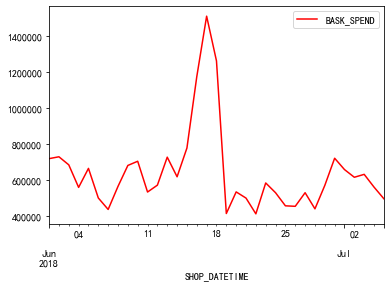

In [14]:
sales_day.plot(color='red')

##### 可见，消费金额8月16-18日达到了高峰。其中在8月17日，销售额达到了最大值，之后消费金额呈下降趋势，并不断趋于平稳的状态。

In [15]:
df_basket['daynameofweek']=df_basket['SHOP_DATETIME'].dt.weekday_name

In [16]:
df_basket.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND,daynameofweek
0,2018-06-01,D007,3,250458,8.0,Friday
1,2018-06-01,D007,3,250200,32.7,Friday
2,2018-06-01,D007,1,161068,16.8,Friday
3,2018-06-01,D007,8,5325,30.4,Friday
4,2018-06-01,D007,8,5361,191.3,Friday


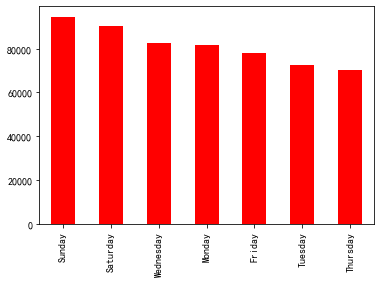

In [17]:
df_basket.daynameofweek.value_counts().plot(kind='bar',color='red')

##### 通过对工作日销售笔数进行统计，可以看出周日周六为单数最大的两天。

### 按门店分类

In [18]:
storeId_count = df_basket.groupby('STORE_CODE').count()['BASK_SPEND'].sort_values(ascending=False)
print(storeId_count.head())

STORE_CODE
A001    66507
D002    62949
D007    37503
A008    36462
A013    30064
Name: BASK_SPEND, dtype: int64


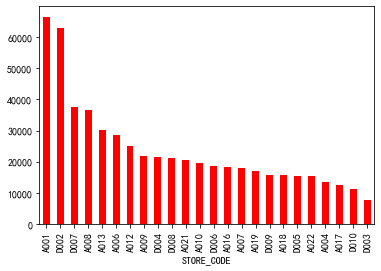

In [19]:
storeId_count.plot(kind='bar',color='red')

##### 门店销售情况，平均店面销售额为939766，仅有A001,A008,A013,D002,D007达到均值以上，其中D003,D010,A017三个店铺距离均值差距较大，值得注意和警惕。

### 产品价格分布

In [20]:
#  依据特征income创造收入人群称呼
prices = []
for price in df_item['ITEM_SPEND']:
    if 0 <= price < 10:
        prices.append(1)  #  1
    elif 10 <= price < 20:
        prices.append(2)  # 
    elif 20 <= price < 50:
        prices.append(3)  #
    elif 50 <= price < 100:
        prices.append(4)  #
    elif 100 <= price < 500:
        prices.append(5)  #
    elif 500 <= price < 1000:
        prices.append(6)  #
    elif 1000 <= price:
        prices.append(7)  #
        
df_item['price'] = pd.DataFrame(prices)

Text(0, 0.5, '价格')

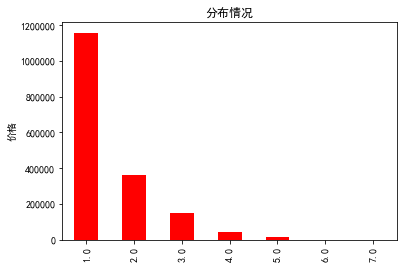

In [21]:
df_item.price.value_counts().plot(kind='bar',color='red')# 柱状图 
plt.title(u"分布情况") # 标题
plt.ylabel(u"价格")  

从商品价格分布可以看出，商品销售主要集中在100元以下商品，其中商品销售平均数量为9561，60元以下商品销售额达到均值以上，其余商品在均值以下。

{'whiskers': [<matplotlib.lines.Line2D at 0x1a17b957f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a17b95e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a17b953c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a17ba1550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a17ba1898>],
 'means': []}

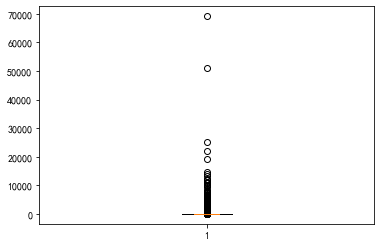

In [22]:
#使用 plt 的 .boxplot() 方法绘制箱线图
plt.figure()
plt.subplot()
plt.boxplot(df_item["ITEM_SPEND"],'rgb')

## 用户行为分析

### 用户下单行为分析

用户消费金额、消费次数的描述统计

In [23]:
# 客户消费分析
grouped_Customer = df_basket[['BASK_CODE','SHOP_DATETIME', 
          'BASK_SPEND']].sort_values(['SHOP_DATETIME']).groupby('BASK_CODE')
grouped_Customer.head()

,BASK_CODE,SHOP_DATETIME,BASK_SPEND
0,250458,2018-06-01,8.00
215288,250469,2018-06-01,89.70
215287,161017,2018-06-01,9.90
215286,161158,2018-06-01,4.00
215285,250476,2018-06-01,86.40
215284,5399,2018-06-01,23.20
215283,5398,2018-06-01,28.73
215282,161038,2018-06-01,57.92
215281,250438,2018-06-01,67.20
215280,160962,2018-06-01,3.00


In [24]:
# 用户消费金额、消费次数的描述统计
grouped_Customer.count().describe()

,SHOP_DATETIME,BASK_SPEND
count,280816.000000,280816.000000
mean,2.029076,2.029076
std,1.077605,1.077605
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,7.000000,7.000000


In [25]:
grouped_Customer['BASK_SPEND'].sum().describe()

count    280816.000000
mean         80.317314
std         282.972947
min           0.010000
25%          20.700000
50%          48.940000
75%          98.700000
max       80064.900000
Name: BASK_SPEND, dtype: float64

### 用户消费金额分布图

{'whiskers': [<matplotlib.lines.Line2D at 0x1a30815358>,
 'caps': [<matplotlib.lines.Line2D at 0x1a30815a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a30806f28>],
 'medians': [<matplotlib.lines.Line2D at 0x1a30815e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a3081e470>],
 'means': []}

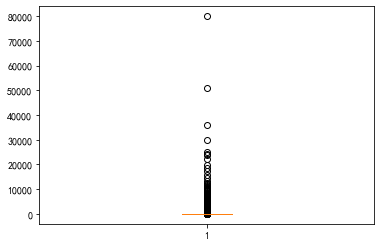

In [26]:
plt.figure()
plt.subplot()
plt.boxplot(df_basket["BASK_SPEND"])

可以看出用户消费金额大都集中在0-1000元以内,从上述直方图可以看出，用户消费金额，绝大部分是呈现集中趋势.

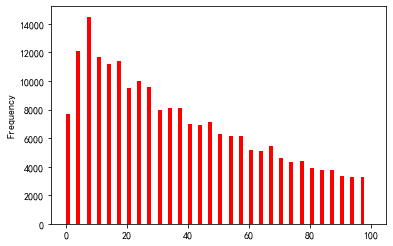

In [27]:
grouped_Customer.sum().query('BASK_SPEND < 100').BASK_SPEND.plot.hist(width=[1.3],color='red',bins = 30)

### 累计消费占比

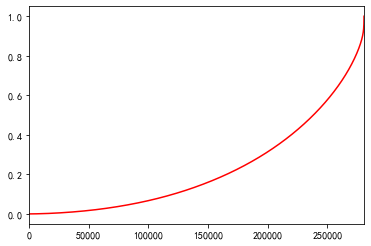

In [28]:
# 用户累计消费占比（百分之多少的用户占百分之多少的销售额）
grouped_Customer.sum().sort_values('BASK_SPEND').apply(lambda x : x.cumsum()/ x.sum()).reset_index().BASK_SPEND.plot(color='r')

我们可以发现：30%的用户贡献了70%的消费额度，而排名前5000的用户就贡献了40%的消费额.

购买时间分析

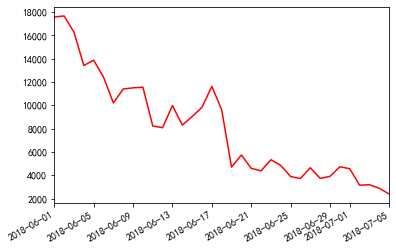

In [29]:
# 用户第一次消费（首购）
grouped_Customer.min().SHOP_DATETIME.value_counts().plot(color='r')

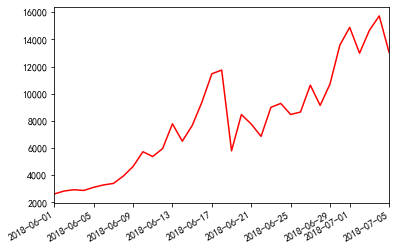

In [30]:
# 用户最后一次消费
grouped_Customer.max().SHOP_DATETIME.value_counts().plot(color='r')

### 新老用户消费比

([<matplotlib.patches.Wedge at 0x1a35bdd5c0>,
 [Text(-0.3521304189966928, 1.0421152373980593, 'False'),
  Text(0.35213051656656097, -1.042115204429226, 'True')],
 [Text(-0.19207113763455969, 0.5684264931262142, '60.37%'),
  Text(0.1920711908544878, -0.568426475143214, '39.63%')])

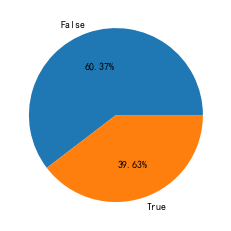

In [31]:
# 多少用户仅消费1次
user_life =grouped_Customer.SHOP_DATETIME.agg(['min','max'])
(user_life['min'] == user_life['max']).value_counts()
# 可视化（饼图）
plt.pie((user_life['min'] == user_life['max']).value_counts(normalize = True),
       autopct='%.2f%%',
       labels = (user_life['min'] == user_life['max']).value_counts().index)

## RFM模型分析

In [37]:
# RFM用户分层
rfm = df_basket.pivot_table(index = 'BASK_CODE',
                    values = ['STORE_CODE','BASK_SPEND','SHOP_DATETIME'],
                    aggfunc= {'BASK_CODE':'count',
                             'BASK_SPEND':'sum',
                             'SHOP_DATETIME':'max'})

In [38]:
rfm.head()

,BASK_CODE,BASK_SPEND,SHOP_DATETIME
BASK_CODE,,,
961,1,25.0,2018-06-18
962,1,132.1,2018-06-18
964,1,28.0,2018-06-18
965,1,40.0,2018-06-18
966,1,12.5,2018-06-18


In [39]:
rfm['R'] = (RFM.SHOP_DATETIME.max() - rfm.SHOP_DATETIME) / np.timedelta64(1,'D')
rfm.rename(columns={'BASK_CODE':'F','BASK_SPEND':'M'},inplace = True)

In [40]:
rfm

,F,M,SHOP_DATETIME,R
BASK_CODE,,,,
961,1,25.00,2018-06-18,17.0
962,1,132.10,2018-06-18,17.0
964,1,28.00,2018-06-18,17.0
965,1,40.00,2018-06-18,17.0
966,1,12.50,2018-06-18,17.0
967,1,14.00,2018-06-18,17.0
969,1,135.20,2018-06-18,17.0
970,1,88.00,2018-06-18,17.0
972,1,536.00,2018-06-18,17.0


### 建立RFM模型
+ R：recency最近一次消费时间，理论上R值越小，价值越高；
+ F：frequency最近一次消费频率，消费频率越高意味着这部分用户对产品的满意度越高，用户粘性比较好，忠诚度也高；
+ M：Montary最近一段时间消费的金额，符合二八原则

In [41]:
def rfm_func(x):
    level = x.apply(lambda x:'1' if x > 0 else '0')
    label = level.R +level.F + level.M
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户'
    }
    result = d[label]
    return result
rfm['label'] = rfm[['R','F','M']].apply(lambda x : x - x.mean()).apply(rfm_func,axis=1)

In [43]:
rfm.groupby('label').sum()

,F,M,R
label,,,
一般价值客户,24142,390991.43,136245.0
一般保持客户,78408,1245849.52,121598.0
一般发展客户,117098,2568485.95,1965610.0
一般挽留客户,102901,2110018.61,393603.0
重要价值客户,36373,1951109.06,190993.0
重要保持客户,144084,7526893.87,188421.0
重要发展客户,34998,3760221.04,454196.0
重要挽留客户,31793,3000817.29,93646.0


In [44]:
rfm.groupby('label').count()

,F,M,SHOP_DATETIME,R
label,,,,
一般价值客户,7660,7660,7660,7660
一般保持客户,24357,24357,24357,24357
一般发展客户,89623,89623,89623,89623
一般挽留客户,69282,69282,69282,69282
重要价值客户,10875,10875,10875,10875
重要保持客户,39323,39323,39323,39323
重要发展客户,21908,21908,21908,21908
重要挽留客户,17788,17788,17788,17788


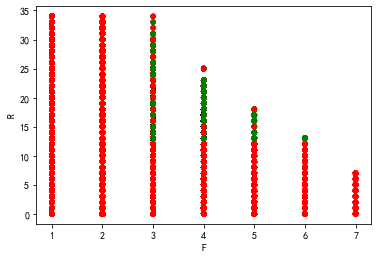

In [45]:
rfm.loc[rfm.label == '重要价值客户','color'] = 'g'
rfm.loc[rfm.label != '重要价值客户','color'] = 'r'
rfm.plot.scatter('F','R',c = rfm.color)

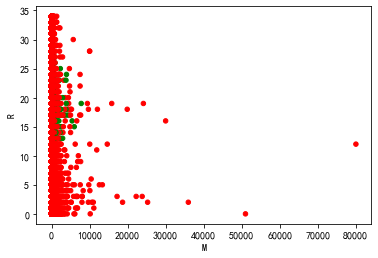

In [46]:
rfm.loc[rfm.label == '重要价值客户','color'] = 'g'
rfm.loc[rfm.label != '重要价值客户','color'] = 'r'
rfm.plot.scatter('M','R',c = rfm.color)

## 3 商品情况分析

### 销售统计

In [48]:
productId_count = df_item.groupby('PROD_CODE')['BASK_CODE'].count().sort_values(ascending=False)
print(productId_count.head(20))

PROD_CODE
205540    12617
21835     10455
194690     9530
72811      7744
178462     7372
197532     7287
205437     6721
1557       6036
109584     5932
216571     5673
198366     5480
75283      5377
3096       5299
124556     5281
3046       5241
219118     4799
191955     4737
124554     4725
7133       4671
196250     4594
Name: BASK_CODE, dtype: int64


### 销售额前十统计

In [49]:
productId_amount = df_item.groupby('PROD_CODE').sum()['ITEM_SPEND'].sort_values(ascending=False)
print(productId_amount.head(20))

PROD_CODE
7137      405783.50
7133      289784.00
136839    281211.40
149413    173820.33
1239      149153.20
154900    141034.70
220834    127622.90
21835     114483.25
88160     103467.20
3971       84972.00
75283      84358.70
11929      82989.80
212574     80924.90
105931     77588.90
155493     73528.96
216571     72182.00
220320     70800.06
197532     66147.30
86772      65967.20
10270      65761.78
Name: ITEM_SPEND, dtype: float64


### 折扣与销售量情况

In [50]:
discount_category=df_item.groupby(['DISCOUNT_TYPE']).sum()[['ITEM_SPEND']]
discount_category.sort_values('ITEM_SPEND',ascending=False,inplace=True)
discount_category['cum_percent']=discount_category['ITEM_SPEND'].cumsum()/discount_category['ITEM_SPEND'].sum()
discount_category.reset_index()

,DISCOUNT_TYPE,ITEM_SPEND,cum_percent
0,n,1.468634e+07,0.651152
1,p,5.355779e+06,0.888613
2,m,2.155000e+06,0.984160
3,v,1.910762e+05,0.992632
4,x,9.161940e+04,0.996694
5,q,4.618240e+04,0.998741
6,Z,2.479515e+04,0.999841
7,s,3.573290e+03,0.999999
8,h,2.150000e+01,1.000000


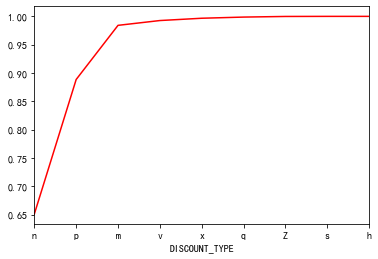

In [53]:
discount_category['cum_percent'].plot(color='red')

#### n,p,m三种折扣类型占据了99%以上的销售额